# **DSA210 Term Project**


# **Motivation**

I like MMA and wanted to explore some stats just for fun. I was curious to see if some of the common things people say about fighters like how their height or fighting style affects their performance actually show up in the data. This project was a way to combine that with what I’ve learned about data analysis.

# **Data Collection**
To construct the dataset used in this project, I implemented a custom web scraping and crawling framework for extracting MMA fighter profiles from sherdog.com and tapology.com.
The primary data collection tool was a recursive web crawler. 
It begins at a single fighter’s Sherdog profile URL and automatically traverses the network of opponents by visiting the links embedded in the fight history section.
Each individual fighter page is scraped for both summary and detailed information. 
This includes metadata (name, nationality), physical attributes (height, reach, weight, weight class) and a full professional fight history. 
Win/loss data is extracted both as summary statistics and through parsing individual fight results. 
After collection, I used additional scripts to process and flatten the nested JSON structures into tabular formats suitable for analysis. The final data was exported into CSV format.

However: **Both Tapology.com and Sherdog.com explicitly disallow web scraping and automated bots on their sites.** 
Tapology’s policies ban any data scraping or bot access​ and Sherdog’s terms similarly prohibit automated crawling beyond what a human user could do and forbid reusing scraped content, so I did **NOT** post the code I used for data collection into github. 

(I can provide it if the instructor wishes to see.)

Problems encountered during data collection: Unfortunately there is no gender information on these sites, so there was no way for me to get that data and do a gender based analysis.



## 
Some additional information about mixed martial arts terminology that might be needed to make sense of the data analysis if you are unfamiliar with them:

**Striking:** Fighting in striking arts takes place on the feet. (Strikes may include punches, kicks, elbows and knees. Emphasis is placed on accurate striking, footwork, and head movement.)


**Grappling:** Grappling is focused on what to do when the fight is taken to the ground. (Grapplers focus on closing the distance, executing a takedown, and submitting their opponent. Submissions can happen different ways such as arm bars, heel hooks, strangles, and shoulder locks.)

**KO Win:** The losing fighter is unconscious and physically unable to continue.


**Submission Win:** When a fighter decides to quit fighting, or “tap out,” the fight ends.


**Decision Win:** Both fighters will have made it through the allotted number of rounds without getting knocked out or submitting. That leaves determining the winner in the hands of the judges, who score each round based on a number of factors, including punches landed. 


# **Exploratory Data Analysis**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data_final.csv")


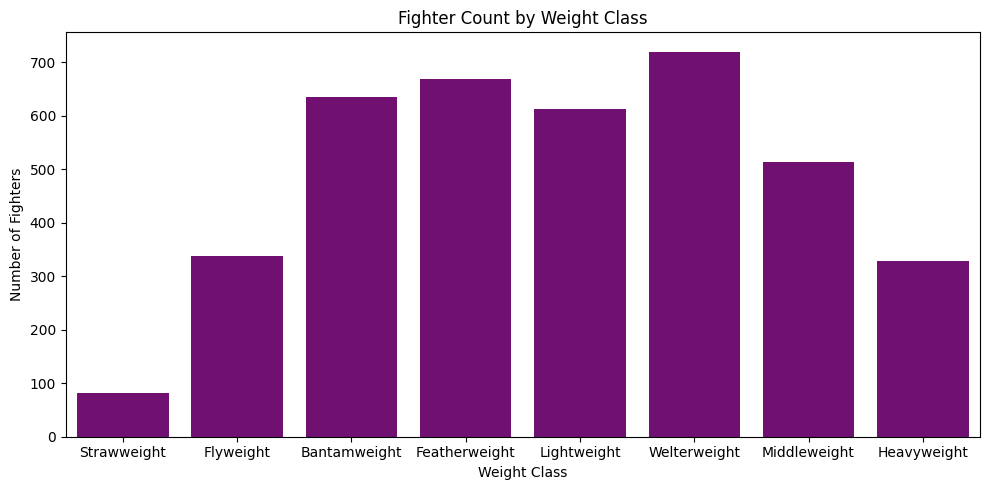

In [2]:
# ------------------
# Histogram for Fighter Count by Weight Class
# ------------------

# Ordered Weight Classes
weight_order = [
    'Strawweight',
    'Flyweight',
    'Bantamweight',
    'Featherweight',
    'Lightweight',
    'Welterweight',
    'Middleweight',
    'Heavyweight'
]

weight_counts = df['primary_division'].value_counts()
weight_counts = weight_counts.reindex(weight_order)

# Histogram
plt.figure(figsize=(10, 5))
sns.barplot(x=weight_counts.index, y=weight_counts.values, color="purple")
plt.title("Fighter Count by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Number of Fighters")
plt.tight_layout()
plt.show()

The bar chart displaying the number of fighters in each weight class reveals an imbalance across divisions.
The data reveals that the majority of fighters are concentrated in the Bantamweight, Featherweight, Lightweight, and Welterweight divisions. These divisions have the highest number of entries, reflecting both the most competitive and most populated ranges for professional athletes in MMA.

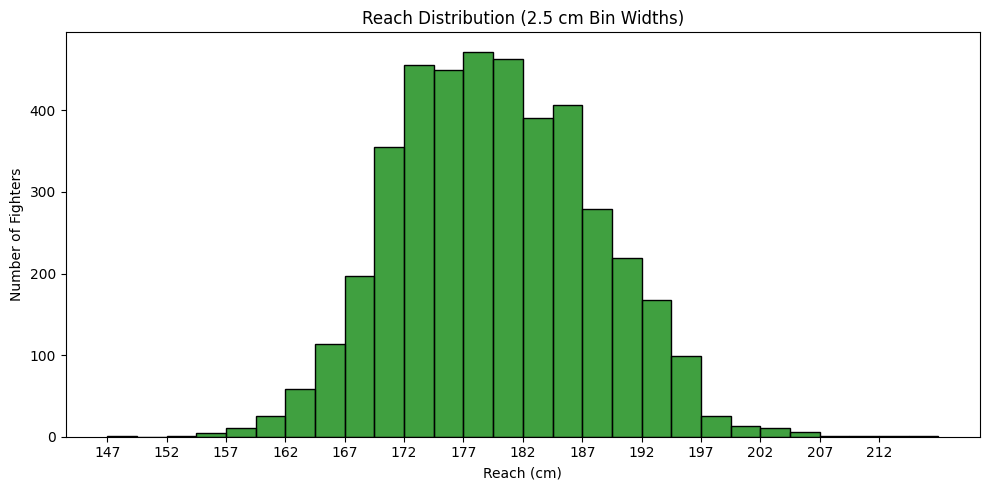

In [3]:
# ----------------------------------------
# Histogram for Reach Distribution
# ----------------------------------------

# Get min and max of reach for bin range
reach_clean = df['reach'].dropna()
min_reach = np.floor(reach_clean.min())
max_reach = np.ceil(reach_clean.max())

# Define custom bins every 2.5 cm (1 inch)
bins = np.arange(min_reach, max_reach + 2.5, 2.5)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(reach_clean, bins=bins, color='green', edgecolor='black')
plt.title("Reach Distribution (2.5 cm Bin Widths)")
plt.xlabel("Reach (cm)")
plt.ylabel("Number of Fighters")
plt.xticks(np.arange(min_reach, max_reach, 5))  # Ticks every 5 cm for readability
plt.tight_layout()
plt.show()



Reach: Measured from fingertip to fingertip when your arms are held parallel to the ground. 

The reach distribution of fighters in the dataset displays a symmetrical bell shaped curve, suggesting that it is approximately normally distributed. The majority of fighters fall within the central reach range with a pronounced peak between 175 and 180 cm. This indicates that most MMA fighters share a common profile in terms of arm length. There are no significant spikes or gaps in the distribution, and the bin width of 2.5 cm (1 inch) provides enough granularity to observe the natural variability in the population without introducing visual noise.

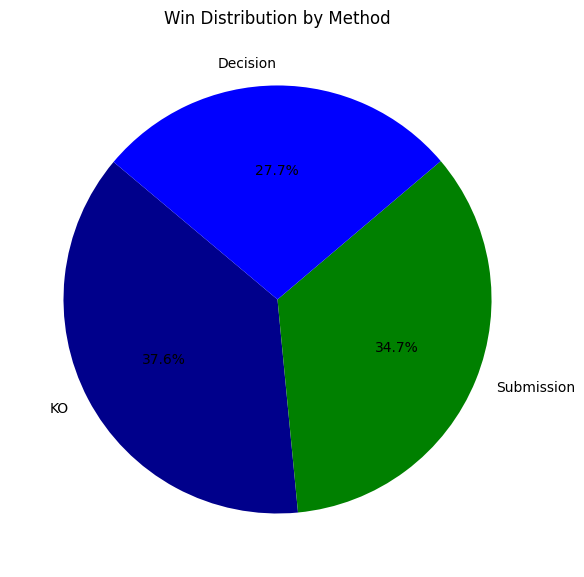

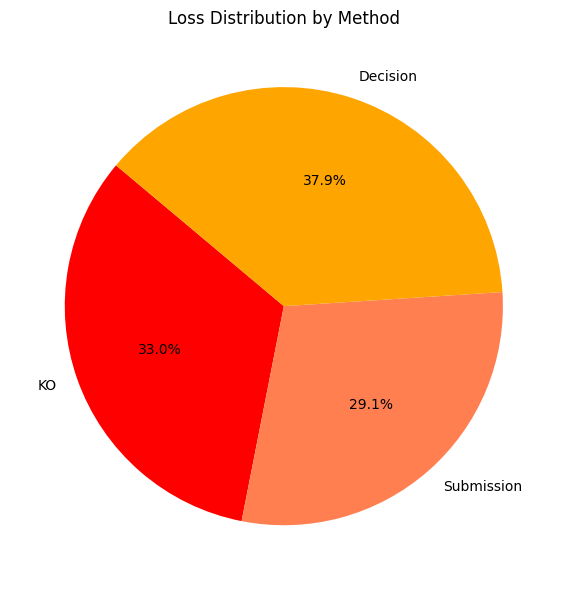

In [4]:
# -------------------------------
# Win Method Percentages
# -------------------------------


win_methods ={
    'KO': 'record_summary_wins_knockouts',
    'Submission': 'record_summary_wins_submissions',
    'Decision': 'record_summary_wins_decisions'
}

total_wins = {method: df[col].sum() for method, col in win_methods.items()}

# Pie Chart for Wins
plt.figure(figsize=(6, 6))
plt.pie(total_wins.values(), labels=total_wins.keys(), autopct='%1.1f%%', startangle=140, colors=["darkblue", "green", "blue"])
plt.title("Win Distribution by Method")
plt.tight_layout()
plt.show()

# -------------------------------
# Loss Method Percentages
# -------------------------------

loss_methods = {
    'KO': 'record_summary_losses_knockouts',
    'Submission': 'record_summary_losses_submissions',
    'Decision': 'record_summary_losses_decisions'
}

total_losses = {method: df[col].sum() for method, col in loss_methods.items()}

# Pie Chart for Losses
plt.figure(figsize=(6, 6))
plt.pie(total_losses.values(), labels=total_losses.keys(), autopct='%1.1f%%', startangle=140, colors=["red", "coral", "orange"])
plt.title("Loss Distribution by Method")
plt.tight_layout()
plt.show()


Decision losses are the most common loss type whereas it has the lowest distribution in wins. This reveales that while fighters secure wins through finishes, they more frequently lose via decision. 
This could reflect that fighters take fewer risks as they lose control of a round, leading to more fights going the distance. It might also reflect that many losing fighters are still able to defend themselves effectively enough to avoid being stopped.


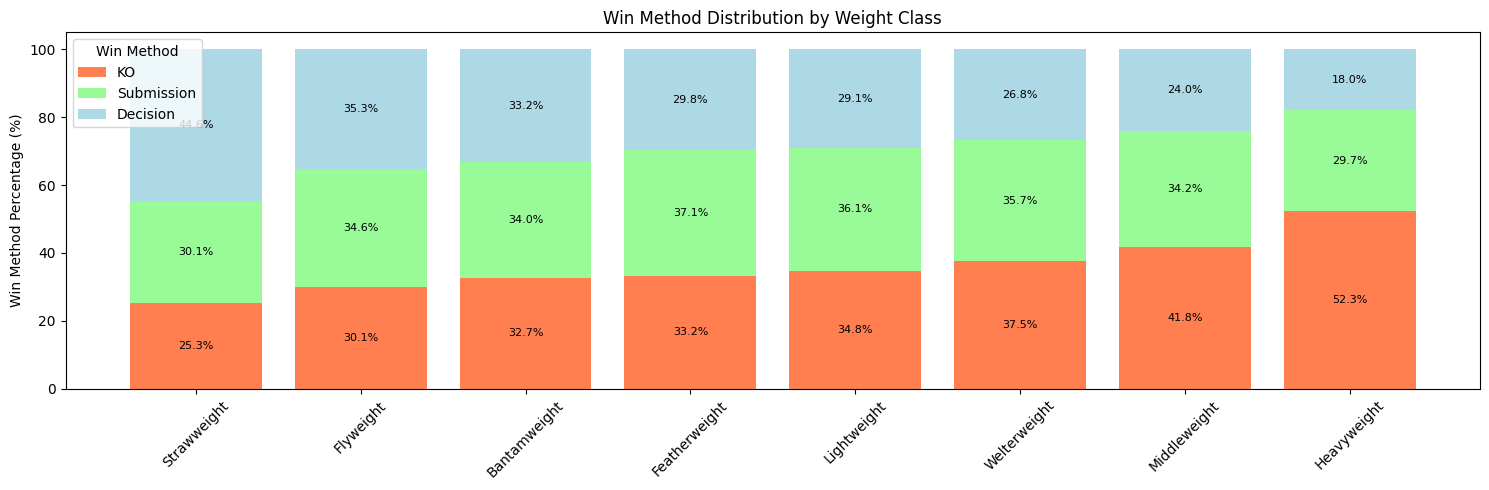

In [5]:
# -------------------------------
# Stacked Bar Chart for Win Methods by Weight Class
# -------------------------------

weight_order = [
    'Strawweight',
    'Flyweight',
    'Bantamweight',
    'Featherweight',
    'Lightweight',
    'Welterweight',
    'Middleweight',
    'Heavyweight'
]

win_methods = {
    'KO': 'record_summary_wins_knockouts',
    'Submission': 'record_summary_wins_submissions',
    'Decision': 'record_summary_wins_decisions'
}

# Group data
method_cols = list(win_methods.values())
df_filtered = df[df['primary_division'].isin(weight_order)].dropna(subset=method_cols)
grouped = df_filtered.groupby('primary_division')[method_cols].mean()
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percent = grouped_percent.reindex(weight_order)

# Plot
plt.figure(figsize=(15, 5))
bar1 = plt.bar(grouped_percent.index, grouped_percent[win_methods['KO']], label='KO', color="coral")
bar2 = plt.bar(grouped_percent.index, grouped_percent[win_methods['Submission']],
               bottom=grouped_percent[win_methods['KO']], label='Submission', color="palegreen")
bottom2 = grouped_percent[win_methods['KO']] + grouped_percent[win_methods['Submission']]
bar3 = plt.bar(grouped_percent.index, grouped_percent[win_methods['Decision']],
               bottom=bottom2, label='Decision', color="lightblue")

# Add percentage labels
for i, weight_class in enumerate(grouped_percent.index):
    ko = grouped_percent.loc[weight_class, win_methods['KO']]
    sub = grouped_percent.loc[weight_class, win_methods['Submission']]
    dec = grouped_percent.loc[weight_class, win_methods['Decision']]
    
    plt.text(i, ko / 2, f"{ko:.1f}%", ha='center', va='center', fontsize=8)
    plt.text(i, ko + sub / 2, f"{sub:.1f}%", ha='center', va='center', fontsize=8)
    plt.text(i, ko + sub + dec / 2, f"{dec:.1f}%", ha='center', va='center', fontsize=8)

# Formatting
plt.xticks(rotation=45)
plt.ylabel("Win Method Percentage (%)")
plt.title("Win Method Distribution by Weight Class")
plt.legend(title="Win Method")
plt.tight_layout()
plt.show()


The distribution of win types illustrates a strong relationship between body size and fight outcomes: lighter fighters are more likely to win by decision or submission, while heavier fighters overwhelmingly favor knockouts.

In the lighter divisions decisions account for a large portion of wins as these fighters tend to rely more on speed, cardio and volume striking, which often leads to longer, closely contested fights that go to the judges.

Submission wins remain relatively stable across divisions, ranging between 30% and 37%. This suggests that grappling effectiveness is somewhat consistent, though it may begin to diminish slightly in higher weight classes.

While KO wins make up only a quarter of victories at Strawweight, they rise steadily through the classes and dominate in Heavyweight. This aligns with the advantage heavier fighters have in power striking, as well as the tendency for fights in these divisions to end suddenly rather than accumulate points over rounds. Also the number of female fighters decrease in the heavier weight classes, so this might be also be an explanation.

Decision wins show the reverse trend. This indicates that the likelihood of a fight going the distance sharply decreases with size, supporting the idea that larger fighters have both more power to finish fights and potentially less cardio capacity to sustain prolonged rounds.


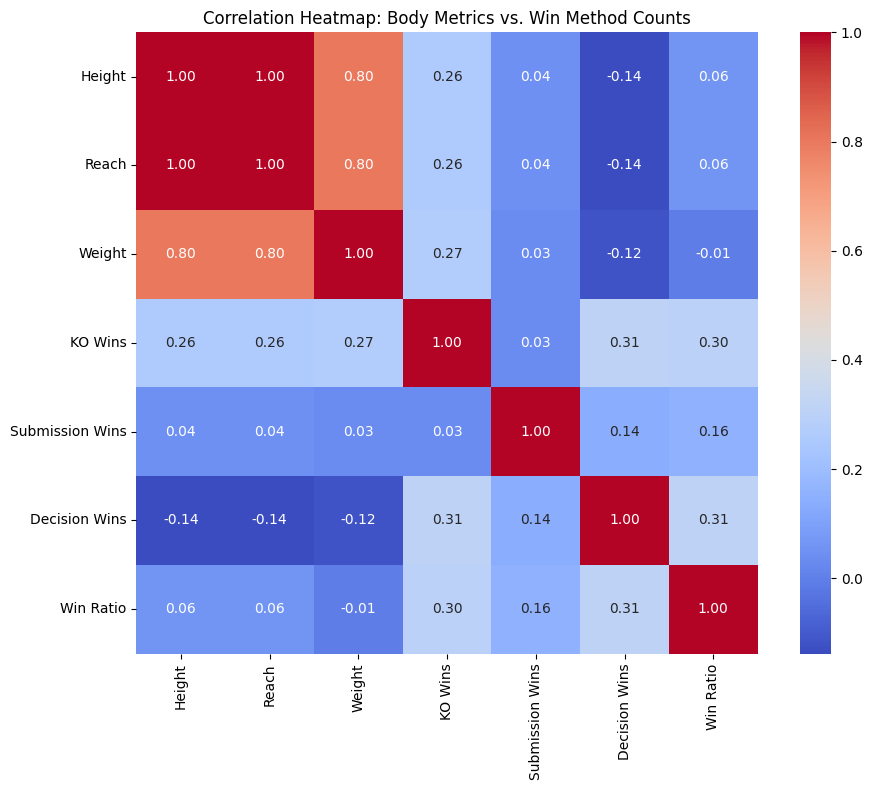

In [6]:
# -------------------------------
# Heatmap
# -------------------------------


correlation_columns = [
    'height',
    'reach',
    'weight',
    'record_summary_wins_knockouts',
    'record_summary_wins_submissions',
    'record_summary_wins_decisions',
    'record_summary_win_ratio'
]

# Compute correlation matrix
corr_matrix = df[correlation_columns].corr(method="spearman")

# Dictionary for renaming labels
rename_labels = {
    'height': 'Height',
    'reach': 'Reach',
    'weight': 'Weight',
    'record_summary_wins_knockouts': 'KO Wins',
    'record_summary_wins_submissions': 'Submission Wins',
    'record_summary_wins_decisions': 'Decision Wins',
    'record_summary_win_ratio': 'Win Ratio'
}
corr_matrix.rename(index=rename_labels, columns=rename_labels, inplace=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt=".2f")
plt.title("Correlation Heatmap: Body Metrics vs. Win Method Counts")
plt.tight_layout()
plt.show()


Initially, I used Pearson correlation to explore the relationships between fighters physical attributes and their fight outcomes. However, this approach skewed the results. Many of the correlations appeared near zero. (even for variables that intuitively seemed to have meaningful associations. For example, weight and KO wins showed only minor correlations.) This was misleading because Pearson can be distorted by outliers and unevenly scaled data.

To address this limitation, I switched to Spearman correlation. Unlike Pearson, Spearman measures monotonic relationships by ranking the data rather than using their raw magnitudes. This means it detects whether one variable tends to increase as another increases, regardless of whether that relationship is strictly linear, which made it more appropriate.

After applying Spearman correlation, the heatmap produced more realistic and interpretable results. Height, reach, and weight remained strongly correlated with each other as expected. KO wins showed a clearer positive correlation with body metrics, especially weight. This confirmed the idea that larger fighters are more likely to secure knockouts. 

Submission wins remained weakly correlated with physical attributes, suggesting that grappling based outcomes are less influenced by body size and more reliant on technique.

Decision wins showed a mild negative correlation with body metrics, implying that lighter fighters may be more likely to win via judge decisions. 

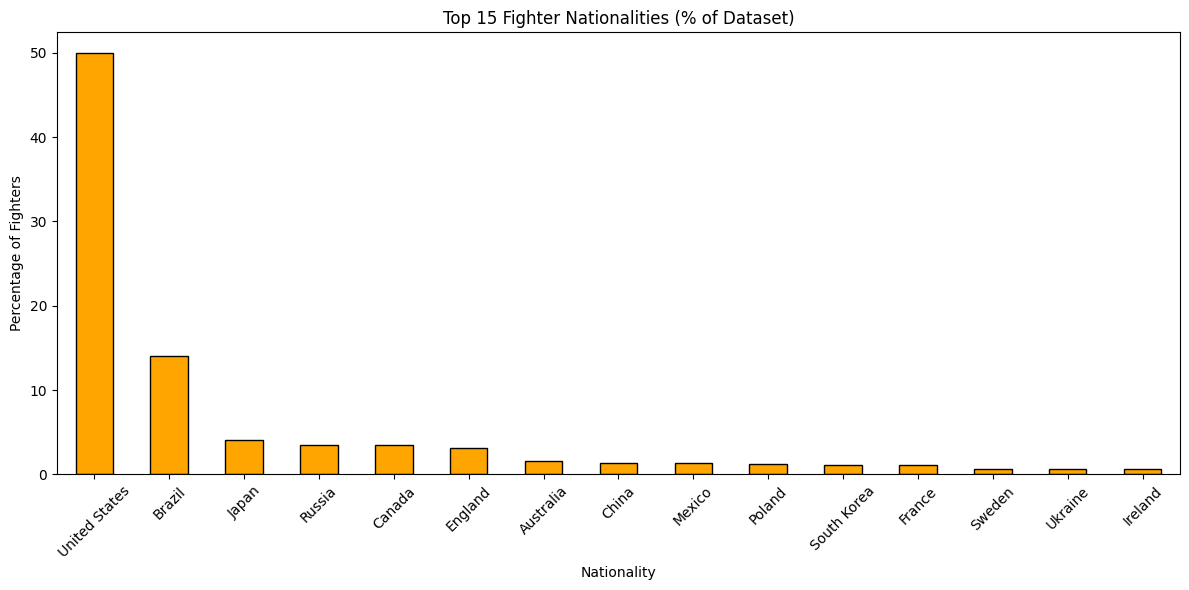

In [7]:
# -------------------------------
# Top Nationalities Chart
# -------------------------------


top_nationalities = df['basic_info_nationality'].value_counts(normalize=True).head(15) * 100

# Plot
plt.figure(figsize=(12, 6))
top_nationalities.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 15 Fighter Nationalities (% of Dataset)")
plt.ylabel("Percentage of Fighters")
plt.xlabel("Nationality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The nationality distribution plot shows a highly skewed dataset. Nearly half of all fighters are from the United States. This imbalance means that any comparison by nationality would be statistically unreliable without normalizing it.

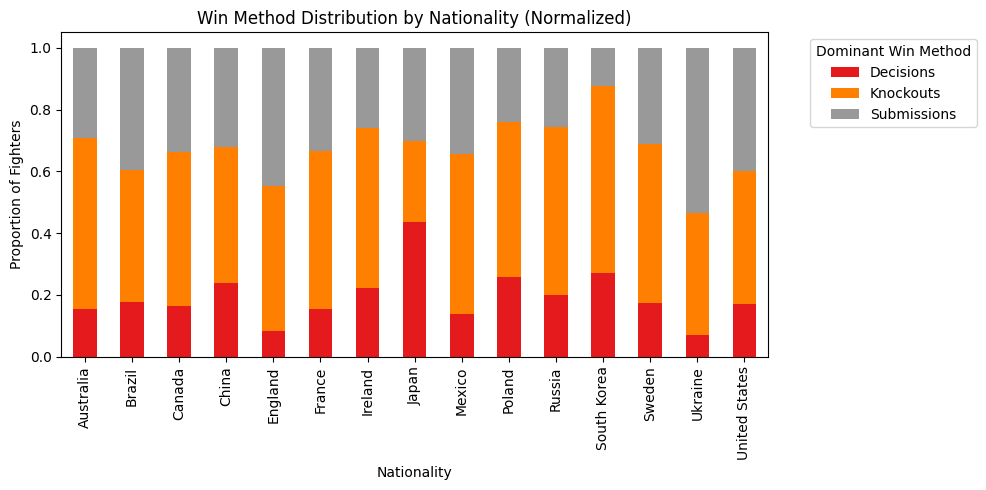

In [8]:
# -------------------------------
# Normalized Nationalities vs Win Methods Stacked Chart
# -------------------------------


# Determine dominant win method
df['dominant_win_method'] = df[['record_summary_wins_knockouts', 'record_summary_wins_submissions', 'record_summary_wins_decisions']].idxmax(axis=1)
df['dominant_win_method'] = df['dominant_win_method'].str.replace('record_summary_wins_', '').str.capitalize()

# Select top 15 nationalities by fighter count
top_nations = df['basic_info_nationality'].value_counts().head(15).index
df_top = df[df['basic_info_nationality'].isin(top_nations)]


# Plot
crosstab = pd.crosstab(df_top['basic_info_nationality'], df_top['dominant_win_method'])
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set1')
plt.title("Win Method Distribution by Nationality (Normalized)")
plt.xlabel("Nationality")
plt.ylabel("Proportion of Fighters")
plt.legend(title="Dominant Win Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This visualization gives us a normalized comparison of win method preferences across the top 15 nationalities in the dataset accounting for population imbalance.

Japan has a very high proportions of fighters who predominantly win by decision suggesting a pattern of fighting that leads to going the distance. 
In contrast, Brazil and Russia show a strong tilt toward submissions which aligns with Brazil’s jiu jitsu and Russia’s sambo background.

# **Hypothesis Testing**


## **Hypothesis 1**

**Null Hypothesis:** Fighter weight is independent of fighting style. (There is no difference in the average weight of fighters across different dominant win methods)

**Alternative Hypothesis:** Fighter weight varies depending on fighting style.(There is difference in the average weight of fighters across different dominant win methods)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


df = pd.read_csv("data_final.csv")

Chi-Square Test:
Chi2 statistic: 257.478845398615
p-value: 1.5094133763865728e-45
Degrees of freedom: 16


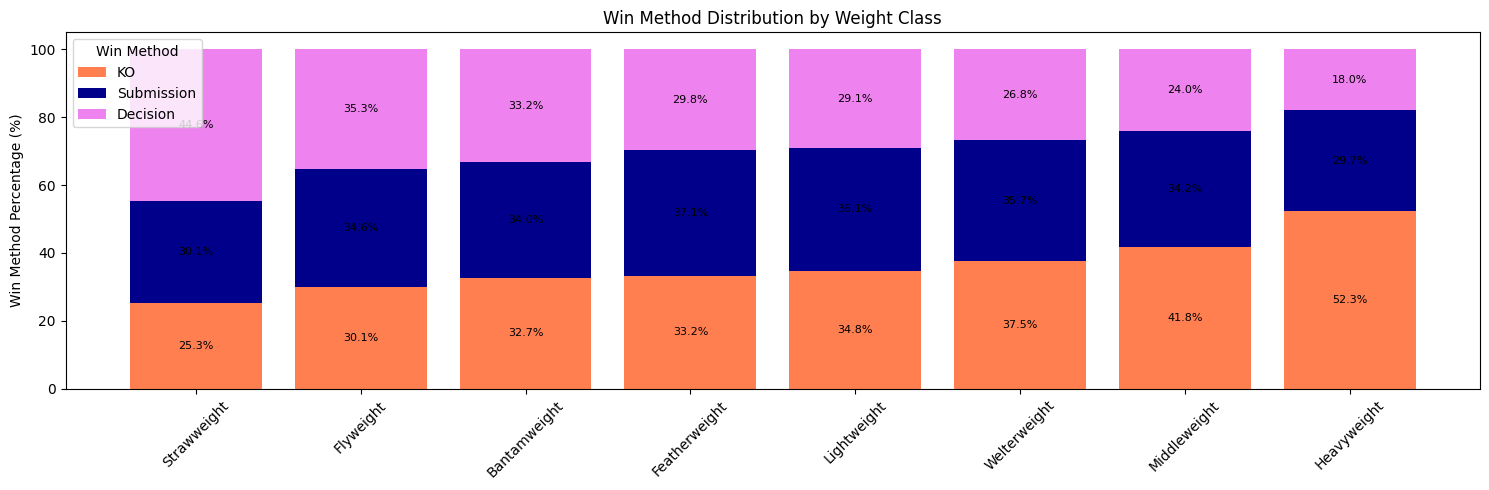

In [10]:
# Define dominant win method
df['dominant_win_method'] = df[
    ['record_summary_wins_knockouts', 'record_summary_wins_submissions', 'record_summary_wins_decisions']
].idxmax(axis=1).str.replace('record_summary_wins_', '').str.capitalize()

# Create contingency table
contingency = pd.crosstab(df['primary_division'], df['dominant_win_method'])

# Run Chis quare test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test:")
print("Chi2 statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

weight_order = [
    'Strawweight',
    'Flyweight',
    'Bantamweight',
    'Featherweight',
    'Lightweight',
    'Welterweight',
    'Middleweight',
    'Heavyweight'
]

win_methods = {
    'KO': 'record_summary_wins_knockouts',
    'Submission': 'record_summary_wins_submissions',
    'Decision': 'record_summary_wins_decisions'
}

# Group data
method_cols = list(win_methods.values())
df_filtered = df[df['primary_division'].isin(weight_order)].dropna(subset=method_cols)
grouped = df_filtered.groupby('primary_division')[method_cols].mean()
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percent = grouped_percent.reindex(weight_order)

# Plot
plt.figure(figsize=(15, 5))
bar1 = plt.bar(grouped_percent.index, grouped_percent[win_methods['KO']], label='KO', color="coral")
bar2 = plt.bar(grouped_percent.index, grouped_percent[win_methods['Submission']],
               bottom=grouped_percent[win_methods['KO']], label='Submission', color="darkblue")
bottom2 = grouped_percent[win_methods['KO']] + grouped_percent[win_methods['Submission']]
bar3 = plt.bar(grouped_percent.index, grouped_percent[win_methods['Decision']],
               bottom=bottom2, label='Decision', color="violet")

# Add percentage labels
for i, weight_class in enumerate(grouped_percent.index):
    ko = grouped_percent.loc[weight_class, win_methods['KO']]
    sub = grouped_percent.loc[weight_class, win_methods['Submission']]
    dec = grouped_percent.loc[weight_class, win_methods['Decision']]
    
    plt.text(i, ko / 2, f"{ko:.1f}%", ha='center', va='center', fontsize=8)
    plt.text(i, ko + sub / 2, f"{sub:.1f}%", ha='center', va='center', fontsize=8)
    plt.text(i, ko + sub + dec / 2, f"{dec:.1f}%", ha='center', va='center', fontsize=8)

# Formatting
plt.xticks(rotation=45)
plt.ylabel("Win Method Percentage (%)")
plt.title("Win Method Distribution by Weight Class")
plt.legend(title="Win Method")
plt.tight_layout()
plt.show()



I wanted to test whether the distribution of dominant fighting styles varies significantly across divisions. To test this, I identified each fighter’s dominant win method (the win type they most frequently achieved) and grouped fighters by weight class. 
I then constructed a contingency table of dominant win method vs. primary division and performed a Chi square test of independence. 
The results were:

1. Chi-square statistic: 257.48
2. Degrees of freedom: 16
3. p-value: 1.51 × 10⁻⁴⁵

**Given the small p-value, I rejected the null hypothesis.**

Fighting style and weight class are statistically associated.

## **Hypothesis 2**
**Null Hypothesis:** Fighter height is not associated with knockout preference (tall and short fighters are equally likely to favor KOs.)

**Alternative Hypothesis:** Taller fighters are more likely to have knockouts as their dominant win method.

T-test result:
t-statistic: 12.81804486683294
p-value: 2.017729723031059e-36


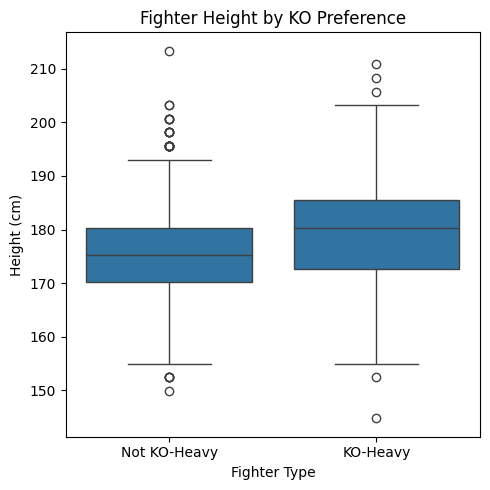

In [11]:

# Calculate KO win % and classify KO-heavy fighters

df_clean = df.dropna(subset=['height', 'record_summary_wins_knockouts', 'record_summary_wins_total', 'record_summary_win_ratio'])
df_clean = df_clean[df_clean['record_summary_wins_total'] > 0]
df_clean['ko_win_pct'] = df_clean['record_summary_wins_knockouts'] / df_clean['record_summary_wins_total']
df_clean['is_ko_heavy'] = df_clean['ko_win_pct'] >= 0.5

# Create two groups by KO preference
group_ko = df_clean[df_clean['is_ko_heavy']]['height']
group_other = df_clean[~df_clean['is_ko_heavy']]['height']

# T-test for height difference
t_stat, p_val = ttest_ind(group_ko, group_other, equal_var=False)
print("T-test result:")
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Plot
plt.figure(figsize=(5, 5))
sns.boxplot(data=df_clean, x='is_ko_heavy', y='height')
plt.xticks([0, 1], ['Not KO-Heavy', 'KO-Heavy'])
plt.title("Fighter Height by KO Preference")
plt.xlabel("Fighter Type")
plt.ylabel("Height (cm)")
plt.tight_layout()
plt.show()


I tested the hypothesis “Taller fighters are more likely to be KO-heavy” using a two sample t-test. 
I grouped fighters based on whether 50% or more of their wins were by knockout (KO-heavy).

The results were:
1. t-statistic = 12.82
1. p-value = 2 × 10⁻³⁶

Since the p value is below 0.05, I reject the null hypothesis. 
The boxplot visually supports this conclusion: KO-heavy fighters show a higher median height.

# **Findings**

One hypothesis I tested was whether KO-heavy fighters are taller than others. This turned out to be true with high significance (a T-test returned a p-value close to zero, suggesting a real height difference between KO-heavy and non-KO-heavy fighters.

I also tested the association between weight class and win method using a Chi-Square test and found a strong relationship, confirming that heavier divisions tend to favor knockouts while lighter divisions see more decisions or submissions.